### Problem 1
Implement serial test and apply to a `samples`

In [5]:
import numpy as np
from scipy.stats import chisquare
np.random.seed(42)
samples = np.random.uniform(0, 1, 1000)
K = 10
N = len(samples) // 2
pairs = samples.reshape(-1, 2)
observed, _, _ = np.histogram2d(pairs[:, 0], pairs[:, 1], bins=np.linspace(0, 1, K+1))
observed = observed.flatten()
expected = np.full(K * K, N / (K * K))
chi2_stat, p_value = chisquare(observed, expected)#критерий х^2
print("Observed:", observed)
print("Expected:", expected)
print(f"Stat hi^2: {chi2_stat}")
print(f"P-value: {p_value}")

Observed: [ 4.  8.  7.  5.  3.  9.  5.  4.  8. 11.  7.  6.  5.  5.  8.  7.  7.  7.
  7.  8.  5.  6.  1. 11.  2.  6.  5.  3.  5.  2.  6.  6.  3.  5.  3.  5.
  5.  4.  7.  6.  3.  4.  5.  6.  3.  4.  2.  4.  2.  5.  8.  1.  6.  3.
  6.  4.  8.  5.  4.  4.  6.  8.  7.  4.  6.  8.  2.  4.  4.  3.  2.  6.
  6.  0.  5.  7.  6.  4.  6.  2.  2.  1.  4.  6.  6.  4.  3.  6.  3.  7.
  1.  4.  4.  7.  2.  7.  4.  4. 11.  4.]
Expected: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5.]
Stat hi^2: 98.4
P-value: 0.49812574145151856


### Permutation test

We again decompose the sequence $x_1, x_2, x_3, ..., x_{dn}$ into consecutive series of length $d$: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), \ldots, (x_{nd-d+1}, x_{nd})$. A series of $d$ elements can be ordered in $d!$ ways and each way of ordering is equally probable. Hence the idea of the test is to count how many times each ordering occurs among $n$ series and apply the $\chi^2$ test.

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [7]:
import numpy as np
from scipy.stats import kstest
def rng_bad(size):
    return np.random.normal(0.5, 0.1, size).clip(0, 1)
def rng_good(size):#равномерное распределение
    return np.random.uniform(0, 1, size)
size = 1000
bad_samples = rng_bad(size)
good_samples = rng_good(size)
def kolmogorov_smirnov_test(samples):#Критерий Колмогорова-Смирнова
    ks_stat, p_value = kstest(samples, 'uniform', args=(0, 1))
    return ks_stat, p_value
ks_stat_bad, p_bad = kolmogorov_smirnov_test(bad_samples)
print(f"Stat Kol-Sm for bad = {ks_stat_bad}, p-value = {p_bad}")
ks_stat_good, p_good = kolmogorov_smirnov_test(good_samples)
print(f"Stat Kol-Sm for good = {ks_stat_good}, p-value = {p_good}")

Stat Kol-Sm for bad = 0.2834432980821358, p-value = 1.406630013065809e-71
Stat Kol-Sm for good = 0.02112525769473228, p-value = 0.7552258807232278


* More randomness tests - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).
* More methods for generating a uniform value [here](https://en.wikipedia.org/wiki/List_of_random_number_generators).
* A story about dynamical systems and the transition to chaos https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

# Generating a sample from a given distribution

Suppose we have a random number generator from the segment [0, 1] (use the `np.random.rand()` function for this). How to get a sample from another distribution $F$?

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

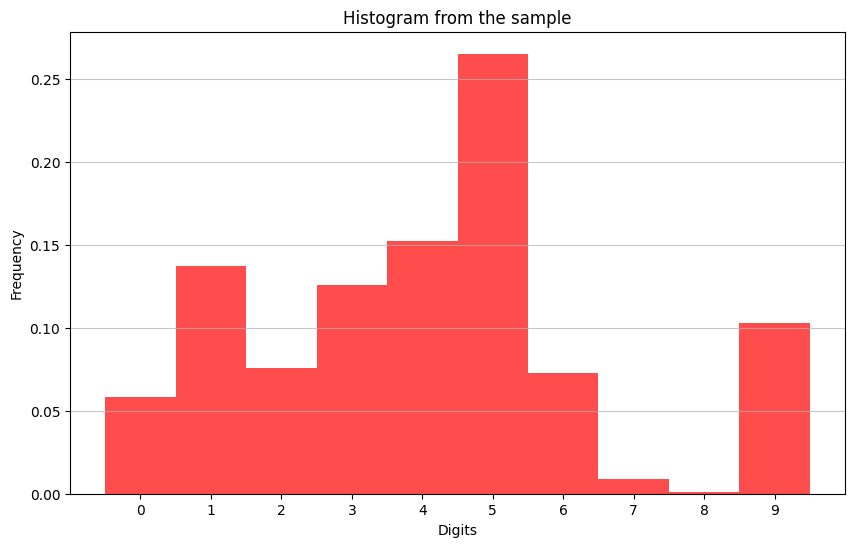

In [14]:
import numpy as np
import matplotlib.pyplot as plt
digits = np.arange(10)
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])#Наши веса, пронормализуем их строчкой ниже
normalized_weights = weights / weights.sum()
sample_size = 1000
sample = np.random.choice(digits, size=sample_size, p=normalized_weights)
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=np.arange(11) - 0.5, density=True, alpha=0.7, color='red')
plt.title('Histogram from the sample')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.xticks(digits)
plt.grid(axis='y', alpha=0.7)
plt.show()

## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

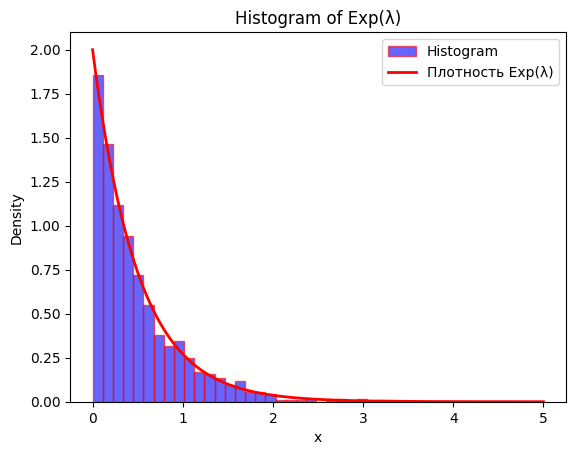

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
lambda_ = 2.0
sample_size = 1000
u = np.random.rand(sample_size)
sample = -np.log(1 - u) / lambda_
plt.hist(sample, bins=30, density=True, alpha=0.6, color='blue', edgecolor='red', label='Histogram')
x = np.linspace(0, 5, 1000)
pdf = expon.pdf(x, scale=1/lambda_)
plt.plot(x, pdf, 'r-', lw=2, label='Плотность Exp(λ)')#График плотности распределения Exp(λ)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Exp(λ)')
plt.legend()#Легенда
plt.show()

## Rejection sampling (Accept-reject method)

The idea of the method is to sample from the distribution we know how to sample from, and then select points that follow the desired distribution. More precisely: let's say we know how to sample from a distribution with density $p$, and we want to sample from a distribution with density $\pi$. Let's take a random $x$ from the distribution $p$. Then take $y$ uniformly distributed on the interval $[0, p(x)]$. If the point $(x, y)$ falls under the graph of $\pi$, we take $x$ as a sampling element from $\pi$. If not, we repeat the procedure for a new $x$. The picture illustrates the idea of the method (the densities are normalised so that one lies entirely under the other):

<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

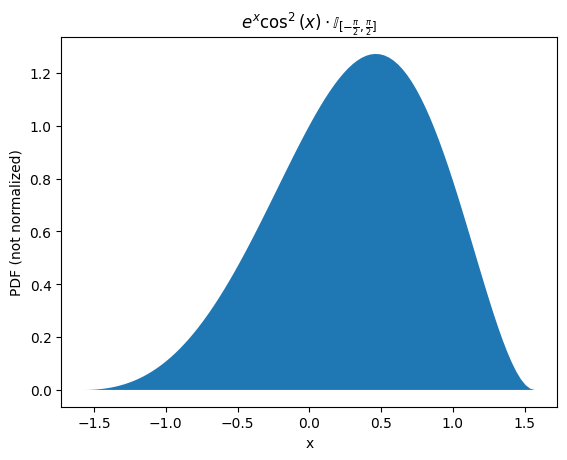

In [ ]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

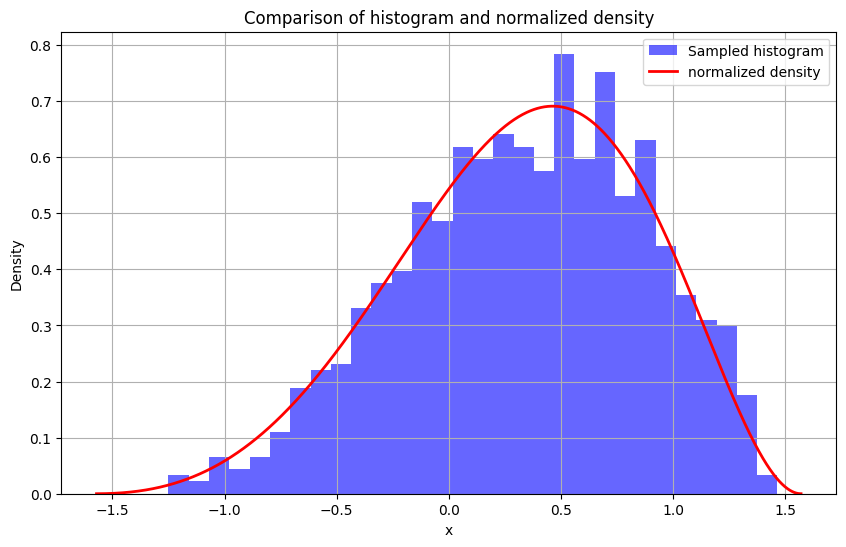

In [20]:
import numpy as np
import matplotlib.pyplot as plt
def target_density(x):
    return np.exp(x) * np.cos(x) ** 2
sample_size = 1000
a = -np.pi/2
b = np.pi/2
x = np.linspace(a, b, 1000)
M = np.max(target_density(x)) * (b - a)#Константа M
samples = []
while len(samples) < sample_size:
    x = np.random.uniform(a, b)
    y = np.random.uniform(0, M)
    if y < target_density(x):
        samples.append(x)
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='blue', label='Sampled histogram')
x = np.linspace(a, b, 1000)
density = target_density(x) / np.trapz(target_density(x), x)
plt.plot(x, density, 'r-', lw=2, label='normalized density')
plt.title('Comparison of histogram and normalized density')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

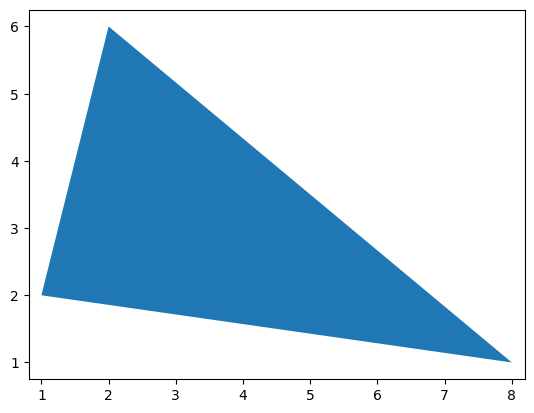

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

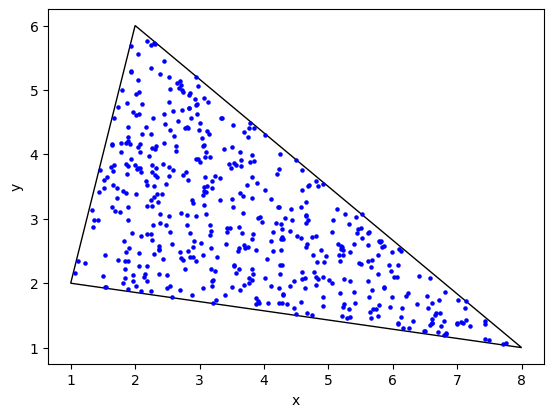

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
vertices = np.array([[1, 2], [2, 6], [8, 1]])
def uniform_triangle_sampling(vertices, n_points):
    A, B, C = vertices
    x_1, y_1 = A
    x_2, y_2 = B
    x_3, y_3 = C
    u = np.random.uniform(0, 1, n_points)
    v = np.random.uniform(0, 1, n_points)
    mask = u + v > 1#При равномерном распределении
    u[mask] = 1 - u[mask]
    v[mask] = 1 - v[mask]
    x = x_1 + u * (x_2 - x_1) + v * (x_3 - x_1)
    y = y_1 + u * (y_2 - y_1) + v * (y_3 - y_1)
    return np.column_stack((x, y))
points = uniform_triangle_sampling(vertices, 500)
fig, ax = plt.subplots()
polygon = Polygon(vertices, closed=True, edgecolor='black', facecolor='none')
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=5, color='blue')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

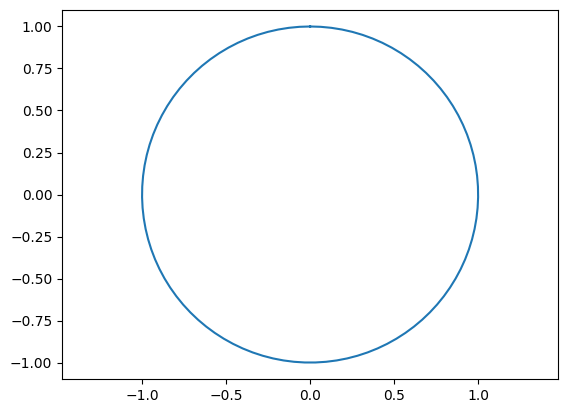

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

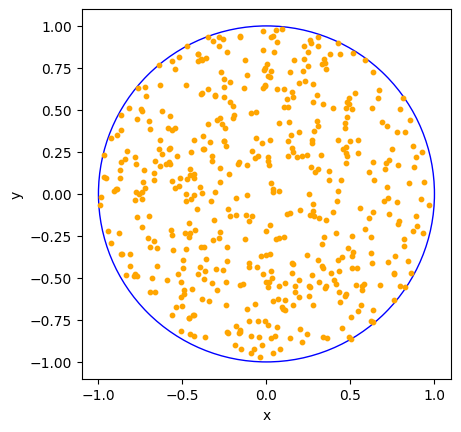

In [24]:
import numpy as np
import matplotlib.pyplot as plt
def generate_points_in_circle(n_points):
    r = np.sqrt(np.random.uniform(0, 1, n_points))
    theta = np.random.uniform(0, 2 * np.pi, n_points)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y
x, y = generate_points_in_circle(500)
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, edgecolor='blue', facecolor='none')
ax.add_patch(circle)
ax.scatter(x, y, s=10, color='orange')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Random normal generator

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

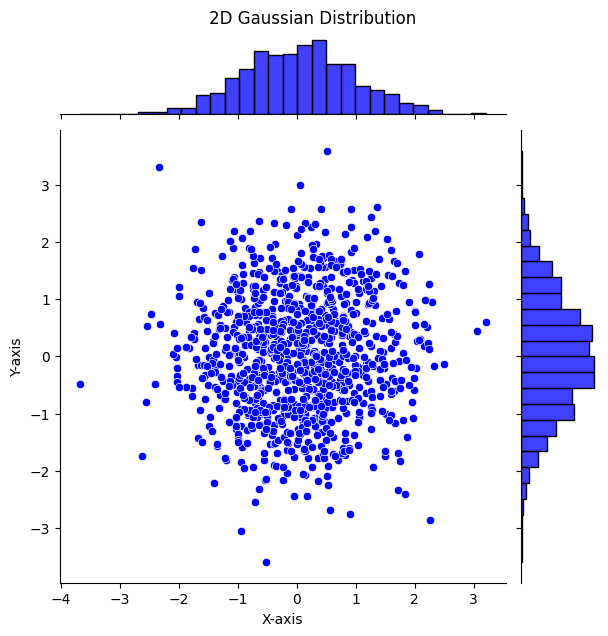

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

<Figure size 800x600 with 0 Axes>

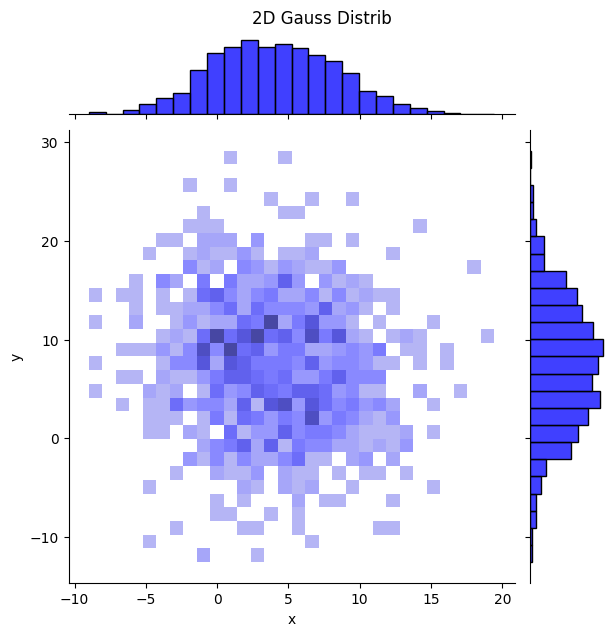

Выборочное средн:
 [4.03061963 7.25262447]
Точное средн:
 [4 7]
Выборочная ковариационная матрица:
 [[19.43030038 -3.47247734]
 [-3.47247734 41.97187995]]
Точная ковариационная матрица:
 [[20 -4]
 [-4 40]]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def box_muller_mod(n):#Aлгоритм Бокса-Мюллера
    samples = []
    while len(samples) < n:
        u1, u2 = np.random.uniform(-1, 1, 2)
        s = u1**2 + u2**2
        if s < 1 and s != 0:
            z0 = u1 * np.sqrt(-2 * np.log(s) / s)
            z1 = u2 * np.sqrt(-2 * np.log(s) / s)
            samples.extend([z0, z1])
    return np.array(samples[:n])
mu = np.array([4, 7])
Sigma = np.array([[20, -4], [-4, 40]])
n = 1000
z = box_muller_mod(2 * n).reshape(2, n)
L = np.linalg.cholesky(Sigma)
samples = (L @ z).T + mu #Mногомерное нормальное распределение
plt.figure(figsize=(8, 6))
sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind='hist', color="blue", bins=30)
plt.xlabel('x')
plt.ylabel('y')
plt.suptitle('2D Gauss Distrib', y=1.02)
plt.show()
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)
print("Выборочное средн:\n", sample_mean)
print("Точное средн:\n", mu)
print("Выборочная ковариационная матрица:\n", sample_cov)
print("Точная ковариационная матрица:\n", Sigma)

# Basic distributions
- **Uniform distribution $\operatorname{U}[a, b]$**:
$$p(x) = \frac{1}{b-a}\cdot\mathbb{I}_{x\in[a, b]}$$

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Normal distribution $\mathcal{N}(\mu, \sigma^2)$**:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- **Gamma distribution $\operatorname{Gamma}(\alpha, \lambda)$**:
$$p(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Beta distribution $\operatorname{Beta}(\alpha, \beta)$**:
$$p(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}\cdot\mathbb{I}_{x\in[0, 1]}$$

- **$\chi^2$ distribution with $k$ degrees of freedom $\chi^2(k)$**:
$$p(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}\cdot\mathbb{I}_{x\geqslant0}$$



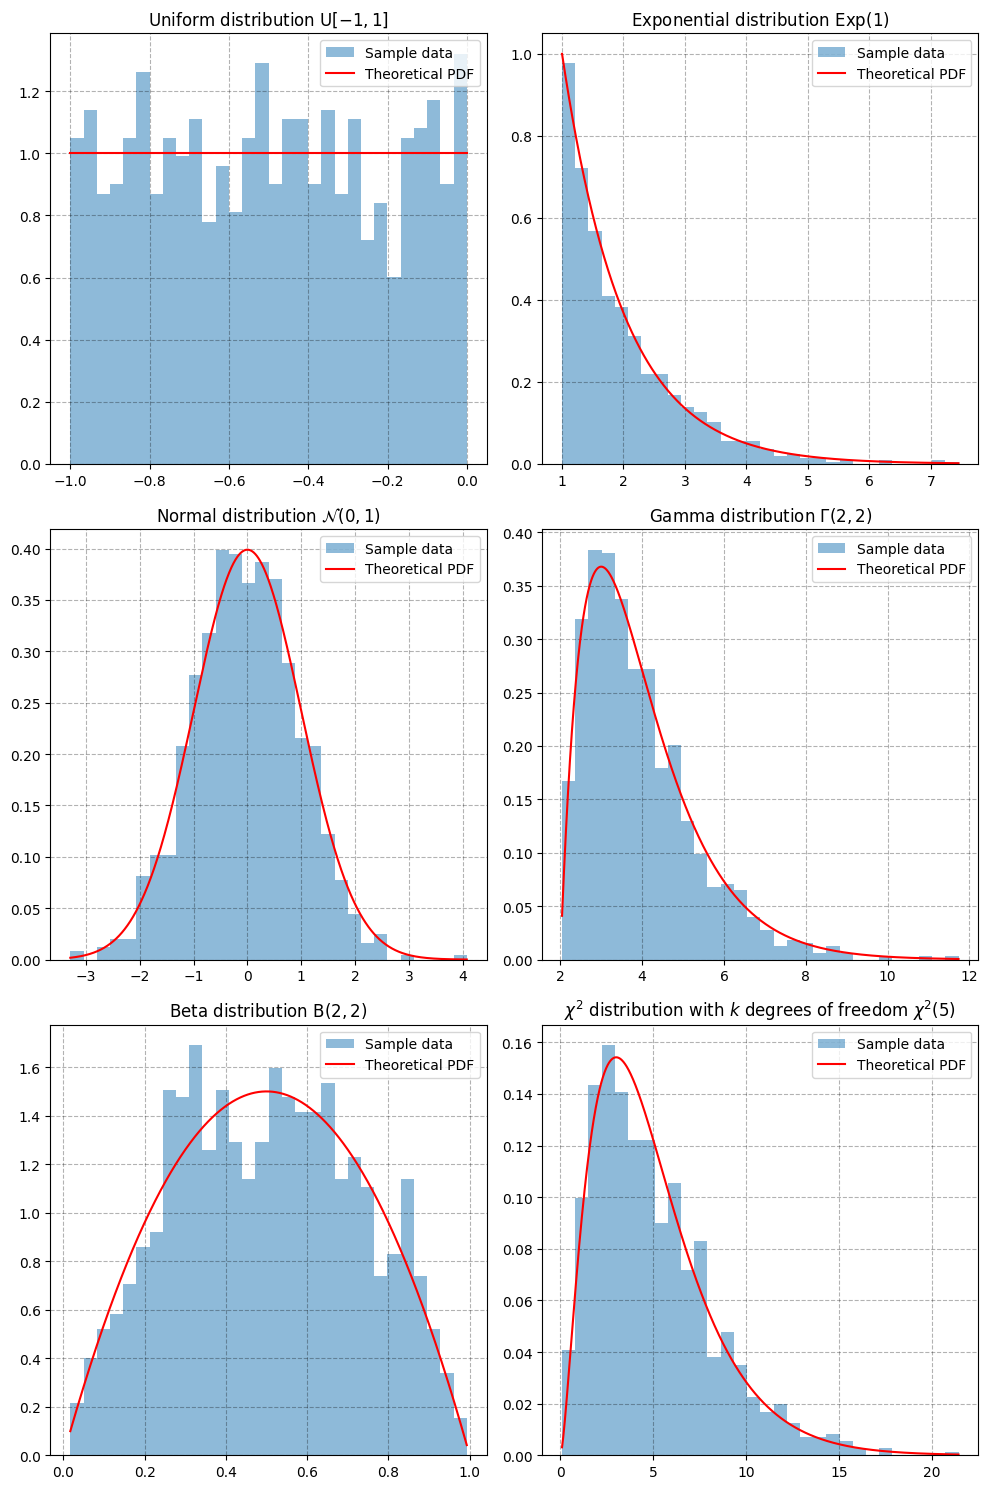

In [ ]:
# Define distributions and their parameters
distributions = [
    ("Uniform distribution $\\operatorname{U}[-1, 1]$", stats.uniform, (-1, 1)),
    ("Exponential distribution $\\operatorname{Exp}(1)$", stats.expon, (1,)),
    ("Normal distribution $\\mathcal{N}(0, 1)$", stats.norm, (0, 1)),
    ("Gamma distribution $\\Gamma(2, 2)$", stats.gamma, (2, 2)),
    ("Beta distribution $\\operatorname{B}(2, 2)$", stats.beta, (2, 2)),
    ("$\\chi^2$ distribution with $k$ degrees of freedom $\\chi^2(5)$", stats.chi2, (5,))
]

# Setup the figure and axes for a 2x3 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjust figsize according to your needs
axs = axs.flatten()  # Flatten the array to easily iterate over it

for ax, (name, dist, params) in zip(axs, distributions):
    # Generate sample data
    data = dist.rvs(*params, size=1000)
    # Generate points for PDF
    x = np.linspace(min(data), max(data), 1000)
    pdf = dist.pdf(x, *params)

    # Plot histogram of sample data
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Sample data')
    # Plot theoretical PDF
    ax.plot(x, pdf, 'r-', label='Theoretical PDF')
    ax.set_title(name)
    ax.legend()
    ax.grid(linestyle='--', color='black', alpha=0.3)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
